# COMPLETE VISUALISATION WITH PYTHON

## TABLE OF CONTENT

|S/N| CONTENT                                       |
|---|---------------------------------------------- |
|1| [MATPLOTLIB](#matplotlib)                       |
|2| [SEABORN](#seaborn)                             |
|3| [FOLIUM](#folium)                               |
|4| [WORD CLOUD](#wordcloud)                        |
|5| [REFERENCE](#reference)                         |

## Ground Rules to Follow

- Sign up on [Ananconda Cloud](https://anaconda.cloud/)
- Navigate to you notebook side of the website.
- 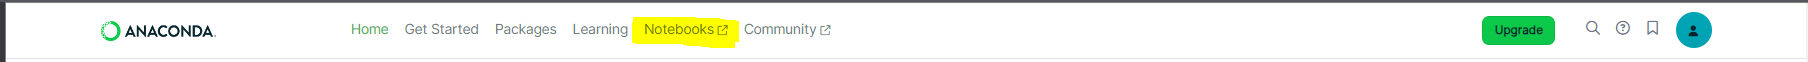
- Create a folder and import the files from the Team's folder.
- Run your notebook along.

### MATPLOTLIB <a class="anchor" id="matplotlib"></a>

#### What is Matplotlib

Matplotlib graphs your data on Figures (e.g., windows, Jupyter widgets, etc.), 
each of which can contain one or more Axes, an area where points can be specified in terms of x-y coordinates (or theta-r in a polar plot, x-y-z in a 3D plot, etc.). 


#### Prerequisite

To get started making matplotlib plots in Python, you will need to install some packages below:

# Using Pip
!pip install numpy

!pip install pandas

!pip install matplotlib

### OR

# Using Conda
conda install -c conda-forge numpy

conda install -c conda-forge pandas

conda install -c conda-forge matplotlib

In [3]:
# import libraries
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library
import warnings
warnings.filterwarnings("ignore")

print('Matplotlib version: ', mpl.__version__) # >= 2.0.0

#### Introduction to Basic Plotting

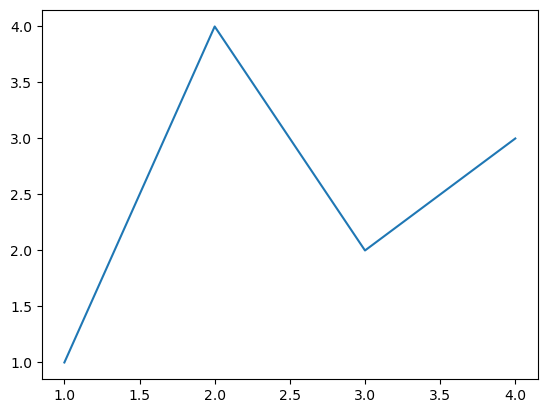

In [63]:
fig, ax = plt.subplots()  # Create a figure containing a single axes.
ax.plot([1, 2, 3, 4], [1, 4, 2, 3])  # Plot some data on the axes.

#### Parts of a Figure
Here are the components of a Matplotlib Figure.

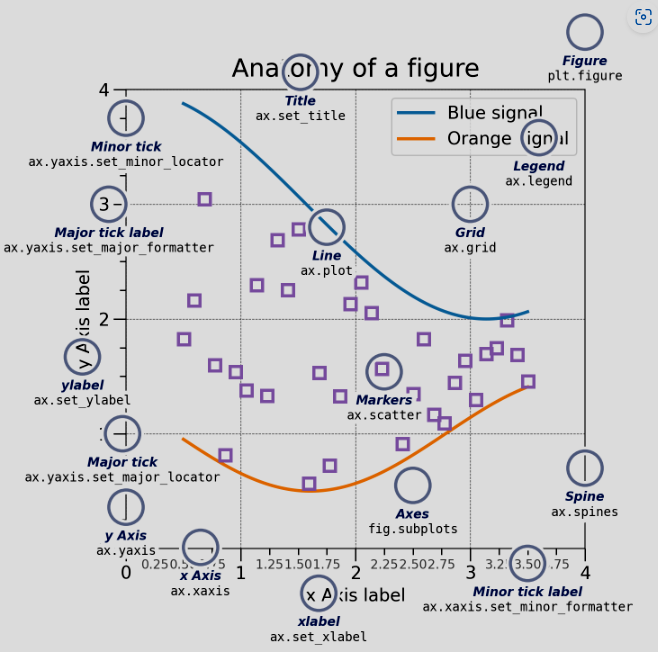

- Figure

The whole figure. The Figure keeps track of all the child Axes, a group of 'special' Artists (titles, figure legends, colorbars, etc), and even nested subfigures.

The easiest way to create a new Figure is with pyplot:

fig = plt.figure()  # an empty figure with no Axes
fig, ax = plt.subplots()  # a figure with a single Axes
fig, axs = plt.subplots(2, 2)  # a figure with a 2x2 grid of Axes
##### a figure with one axes on the left, and two on the right:

fig, axs = plt.subplot_mosaic([['left', 'right_top'], ['left', 'right_bottom']])

It is often convenient to create the Axes together with the Figure, but you can also manually add Axes later on. Note that many Matplotlib backends support zooming and panning on figure windows. For more on Figures, see Creating, viewing, and saving Matplotlib Figures.

- Axes

An Axes is an Artist attached to a Figure that contains a region for plotting data, and usually includes two (or three in the case of 3D) Axis objects (be aware of the difference between Axes and Axis) that provide ticks and tick labels to provide scales for the data in the Axes. Each Axes also has a title (set via set_title()), an x-label (set via set_xlabel()), and a y-label set via set_ylabel()).

The Axes class and its member functions are the primary entry point to working with the OOP interface, and have most of the plotting methods defined on them (e.g. ax.plot(), shown above, uses the plot method)

- Axis

These objects set the scale and limits and generate ticks (the marks on the Axis) and ticklabels (strings labeling the ticks). The location of the ticks is determined by a Locator object and the ticklabel strings are formatted by a Formatter. The combination of the correct Locator and Formatter gives very fine control over the tick locations and labels.

- Artist

Basically, everything visible on the Figure is an Artist (even Figure, Axes, and Axis objects). This includes Text objects, Line2D objects, collections objects, Patch objects, etc. When the Figure is rendered, all of the Artists are drawn to the canvas. Most Artists are tied to an Axes; such an Artist cannot be shared by multiple Axes, or moved from one to another.

##### Matplotlib Application Interfaces (APIs)

Matplotlib has two major application interfaces, or styles of using the library:

An explicit "Axes" interface that uses methods on a Figure or Axes object to create other Artists, and build a visualization step by step. This has also been called an "object-oriented" interface.

An implicit "pyplot" interface that keeps track of the last Figure and Axes created, and adds Artists to the object it thinks the user wants.

In addition, a number of downstream libraries (like pandas and xarray) offer a plot method implemented directly on their data classes so that users can call data.plot().

The difference between these interfaces can be a bit confusing, particularly given snippets on the web that use one or the other, or sometimes multiple interfaces in the same example. Here we attempt to point out how the "pyplot" and downstream interfaces relate to the explicit "Axes" interface to help users better navigate the library.

##### Native Matplotlib interfaces
The explicit "Axes" interface
The "Axes" interface is how Matplotlib is implemented, and many customizations and fine-tuning end up being done at this level.

This interface works by instantiating an instance of a Figure class (fig below), using a method subplots method (or similar) on that object to create one or more Axes objects (ax below), and then calling drawing methods on the Axes (plot in this example):

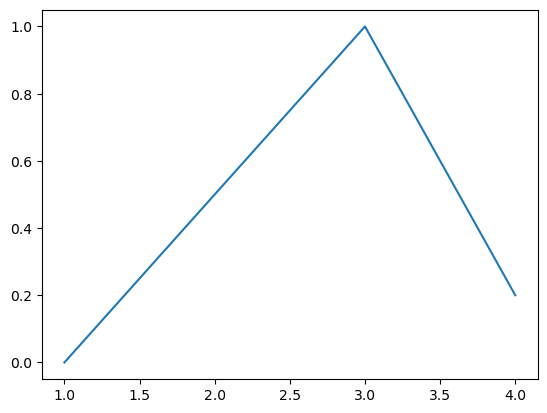

In [64]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.subplots()
ax.plot([1, 2, 3, 4], [0, 0.5, 1, 0.2])

We call this an "explicit" interface because each object is explicitly referenced, and used to make the next object. Keeping references to the objects is very flexible, and allows us to customize the objects after they are created, but before they are displayed.

##### The implicit "pyplot" interface
The pyplot module shadows most of the Axes plotting methods to give the equivalent of the above, where the creation of the Figure and Axes is done for the user:

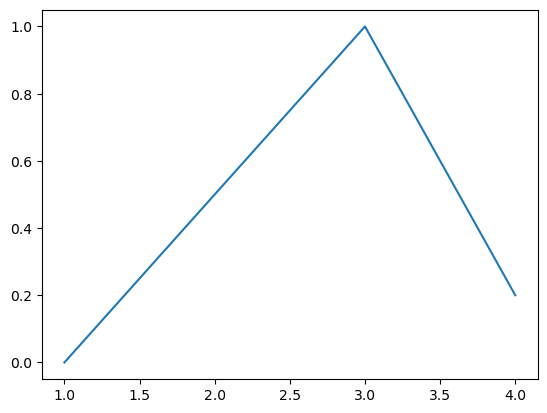

In [65]:
import matplotlib.pyplot as plt

plt.plot([1, 2, 3, 4], [0, 0.5, 1, 0.2])

This can be convenient, particularly when doing interactive work or simple scripts. A reference to the current Figure can be retrieved using gcf and to the current Axes by gca. The pyplot module retains a list of Figures, and each Figure retains a list of Axes on the figure for the user so that the following:

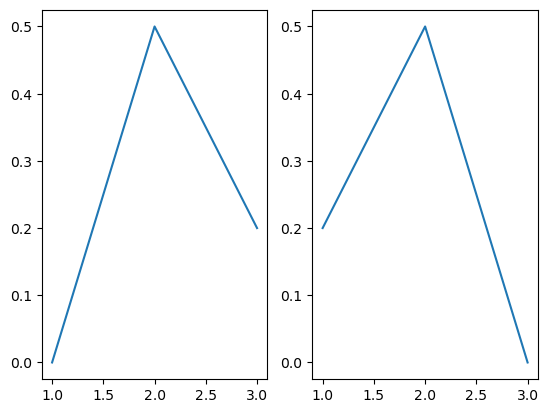

In [66]:
import matplotlib.pyplot as plt

plt.subplot(1, 2, 1)
plt.plot([1, 2, 3], [0, 0.5, 0.2])

plt.subplot(1, 2, 2)
plt.plot([3, 2, 1], [0, 0.5, 0.2])

In [ ]:
# is equivalent to:

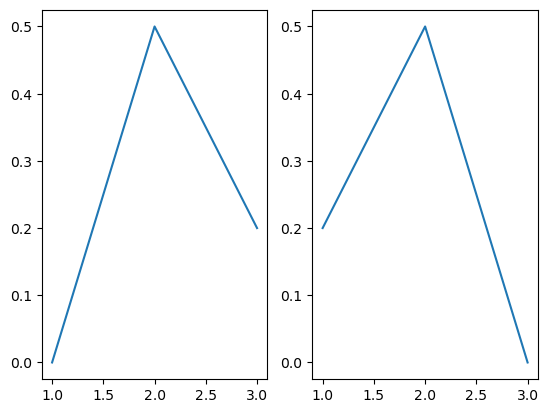

In [67]:
import matplotlib.pyplot as plt

plt.subplot(1, 2, 1)
ax = plt.gca()
ax.plot([1, 2, 3], [0, 0.5, 0.2])

plt.subplot(1, 2, 2)
ax = plt.gca()
ax.plot([3, 2, 1], [0, 0.5, 0.2])

In [ ]:
# In the explicit interface, this would be:

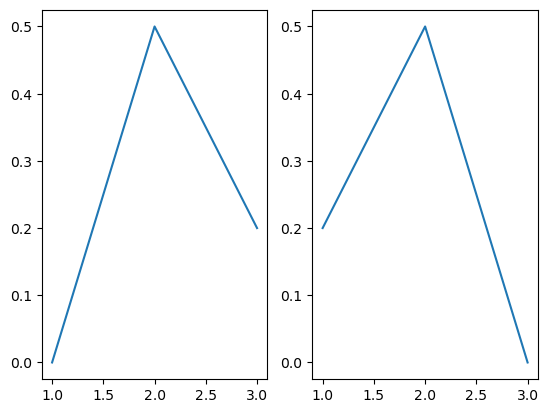

In [68]:
fig, axs = plt.subplots(1, 2)
axs[0].plot([1, 2, 3], [0, 0.5, 0.2])
axs[1].plot([3, 2, 1], [0, 0.5, 0.2])

Why be explicit?
What happens if you have to backtrack, and operate on an old axes that is not referenced by plt.gca()? One simple way is to call subplot again with the same arguments. However, that quickly becomes inelegant. You can also inspect the Figure object and get its list of Axes objects, however, that can be misleading (colorbars are Axes too!). The best solution is probably to save a handle to every Axes you create, but if you do that, why not simply create the all the Axes objects at the start?

The first approach is to call plt.subplot again:

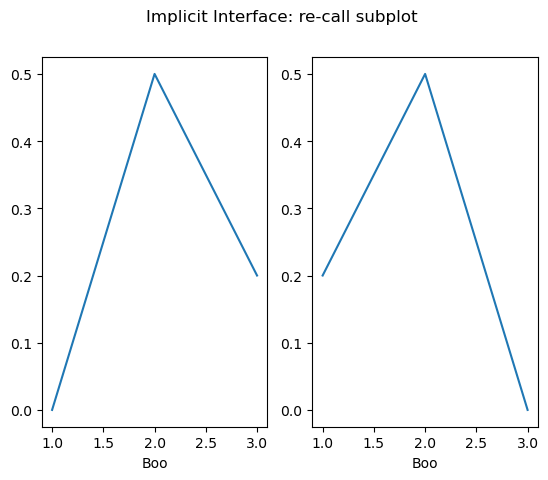

In [69]:
plt.subplot(1, 2, 1)
plt.plot([1, 2, 3], [0, 0.5, 0.2])

plt.subplot(1, 2, 2)
plt.plot([3, 2, 1], [0, 0.5, 0.2])

plt.suptitle('Implicit Interface: re-call subplot')

for i in range(1, 3):
    plt.subplot(1, 2, i)
    plt.xlabel('Boo')

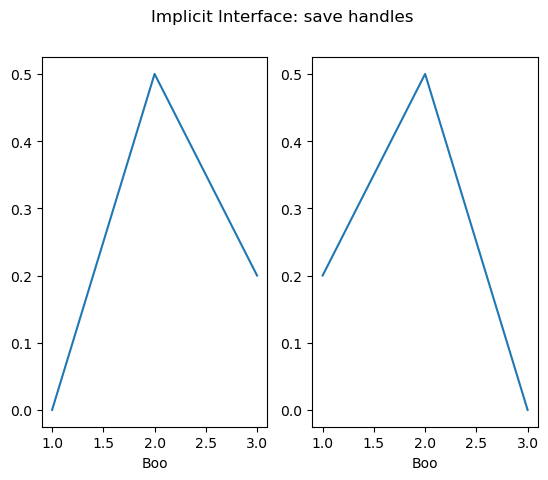

In [70]:
# The second is to save a handle:

axs = []
ax = plt.subplot(1, 2, 1)
axs += [ax]
plt.plot([1, 2, 3], [0, 0.5, 0.2])

ax = plt.subplot(1, 2, 2)
axs += [ax]
plt.plot([3, 2, 1], [0, 0.5, 0.2])

plt.suptitle('Implicit Interface: save handles')

for i in range(2):
    plt.sca(axs[i])
    plt.xlabel('Boo')

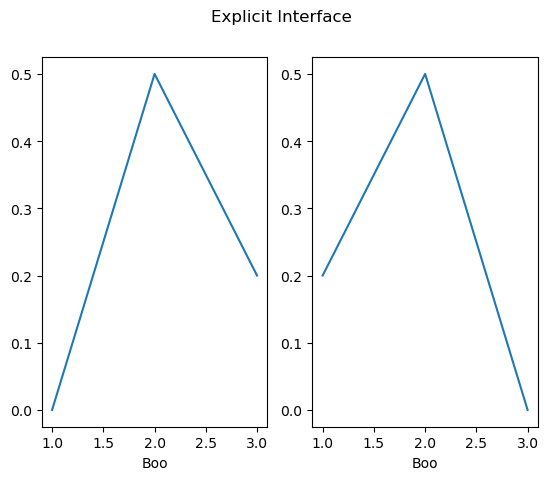

In [71]:
# However, the recommended way would be to be explicit from the outset:

import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2)
axs[0].plot([1, 2, 3], [0, 0.5, 0.2])
axs[1].plot([3, 2, 1], [0, 0.5, 0.2])
fig.suptitle('Explicit Interface')
for i in range(2):
    axs[i].set_xlabel('Boo')

#### Types of Plot

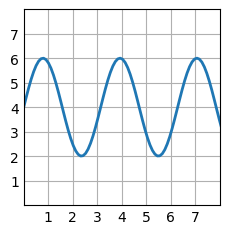

In [77]:
# plot(x, y)

plt.style.use('_mpl-gallery')

# make data
x = np.linspace(0, 10, 100)
y = 4 + 2 * np.sin(2 * x)

# plot
fig, ax = plt.subplots()

ax.plot(x, y, linewidth=2.0)

ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
       ylim=(0, 8), yticks=np.arange(1, 8))

plt.show()

#### Best Cases for Line PLot

- Trend Visualization: Line plots are ideal for visualizing trends in data. They allow you to represent how a variable changes over time or across an ordered sequence of events. This is particularly useful for tracking trends in time series data, such as stock prices, temperature fluctuations, or sales figures, enabling you to spot upward or downward patterns easily.

- Time Series Analysis: Line plots are a natural choice for visualizing time series data, where data points are collected at regular intervals over time. They provide a clear representation of how a variable evolves, making it easier to identify seasonality, trends, and anomalies in the data.

- Comparing Multiple Series: Line plots are versatile for comparing multiple datasets or variables. You can overlay multiple lines on the same plot to compare their trends or changes over time. This makes it easy to assess relationships between different variables or track the performance of various entities, such as comparing sales trends for multiple products or comparing the stock prices of different companies.

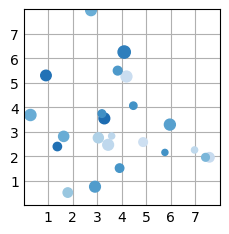

In [78]:
# scatter(x, y) 

plt.style.use('_mpl-gallery')

# make the data
np.random.seed(3)
x = 4 + np.random.normal(0, 2, 24)
y = 4 + np.random.normal(0, 2, len(x))
# size and color:
sizes = np.random.uniform(15, 80, len(x))
colors = np.random.uniform(15, 80, len(x))

# plot
fig, ax = plt.subplots()

ax.scatter(x, y, s=sizes, c=colors, vmin=0, vmax=100)

ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
       ylim=(0, 8), yticks=np.arange(1, 8))

plt.show()

#### Base Case Use For Scatter Plot

- Data Point Distribution: Scatter plots are excellent for visualizing the distribution and relationships between individual data points. They allow you to see the spread and concentration of data, making them useful for identifying clusters, outliers, and patterns within the data.

- Correlation Analysis: Scatter plots are often used to assess the relationship between two variables. By plotting one variable on the x-axis and another on the y-axis, you can visually inspect how they interact. Scatter plots can help you determine whether there's a positive, negative, or no correlation between the variables.

- Multivariate Data Exploration: Scatter plots can be extended to visualize relationships among multiple variables. You can create scatter matrix plots to display scatter plots between pairs of variables in a multivariate dataset. This allows you to identify correlations and gain insights into complex data relationships.

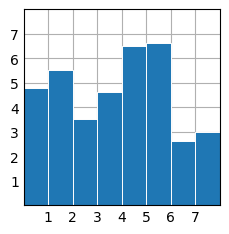

In [79]:
# bar(x, height)

plt.style.use('_mpl-gallery')

# make data:
x = 0.5 + np.arange(8)
y = [4.8, 5.5, 3.5, 4.6, 6.5, 6.6, 2.6, 3.0]

# plot
fig, ax = plt.subplots()

ax.bar(x, y, width=1, edgecolor="white", linewidth=0.7)

ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
       ylim=(0, 8), yticks=np.arange(1, 8))

plt.show()

#### Base Case Use For Bar Plot

- Categorical Data Comparison: Bar plots are excellent for comparing and visualizing data across different categories or groups. You can use them to display the distribution or comparison of categorical data, such as product sales by category, the performance of different teams, or survey responses by options.

- Frequency Distribution: Bar plots are commonly used to visualize the frequency distribution of categorical variables. They show the count or percentage of data points within each category, making it easy to see which categories are more or less common. This is useful for exploring data and understanding the distribution of categorical variables.

- Comparison Between Categories: Bar plots make it straightforward to compare values between different categories. Whether you want to compare sales figures for different products, scores for different students, or revenue for different months, bar plots provide a clear visual representation of the differences and trends among categories.

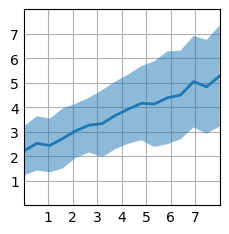

In [82]:
# fill_between(x, y1, y2)

plt.style.use('_mpl-gallery')

# make data
np.random.seed(1)
x = np.linspace(0, 8, 16)
y1 = 3 + 4*x/8 + np.random.uniform(0.0, 0.5, len(x))
y2 = 1 + 2*x/8 + np.random.uniform(0.0, 0.5, len(x))

# plot
fig, ax = plt.subplots()

ax.fill_between(x, y1, y2, alpha=.5, linewidth=0)
ax.plot(x, (y1 + y2)/2, linewidth=2)

ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
       ylim=(0, 8), yticks=np.arange(1, 8))

plt.show()

#### Base Case for Fill Between 

- Uncertainty Visualization: fill_between is particularly useful when you want to visualize uncertainty or variation in your data. It allows you to shade the area between two curves, which can represent the range of values or confidence intervals. This is commonly used in scientific research, economics, and data analysis to show the uncertainty in predictions or measurements.

- Time Series Data: fill_between is effective for visualizing time series data, especially when you want to highlight specific time periods or events. For instance, you can use it to shade the area between two time series lines to emphasize the range of values or to mark significant events like economic recessions or environmental events.

- Comparing Groups or Conditions: When comparing multiple groups or conditions, fill_between can help illustrate the differences or variations between them. By filling the area between two curves representing different conditions, you can visually emphasize the regions where the conditions differ, making it useful in experimental data analysis or A/B testing.

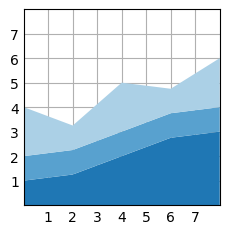

In [83]:
# stackplot(x, y)

plt.style.use('_mpl-gallery')

# make data
x = np.arange(0, 10, 2)
ay = [1, 1.25, 2, 2.75, 3]
by = [1, 1, 1, 1, 1]
cy = [2, 1, 2, 1, 2]
y = np.vstack([ay, by, cy])

# plot
fig, ax = plt.subplots()

ax.stackplot(x, y)

ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
       ylim=(0, 8), yticks=np.arange(1, 8))

plt.show()

Best Case Uses of Stack Plot

- Part-to-Whole Relationships: Stackplots are excellent for displaying part-to-whole relationships within a dataset. They allow you to represent how individual components contribute to a whole, making it easy to see the relative proportions of different categories or groups. Stackplots are commonly used for visualizing data with a cumulative or additive nature, such as budget allocation, population composition, or market share by product.

- Time Series Data: Stackplots are effective for visualizing the cumulative changes over time in a dataset with multiple components. For instance, in finance, you can use a stackplot to display the cumulative value of a portfolio with each component representing a different asset. This provides a clear view of how the portfolio's composition evolves.

- Sequential Data Comparison: Stackplots can be used to compare the sequential changes in data across multiple time points or events. They are valuable for showing how different categories or groups contribute to a changing total over time. This is useful in fields like epidemiology to display the progression of diseases or in business to track revenue contributions over quarters.

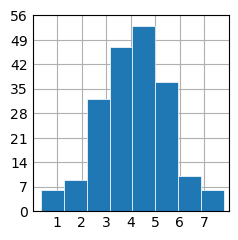

In [85]:
# hist(x)

plt.style.use('_mpl-gallery')

# make data
np.random.seed(1)
x = 4 + np.random.normal(0, 1.5, 200)

# plot:
fig, ax = plt.subplots()

ax.hist(x, bins=8, linewidth=0.5, edgecolor="white")

ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
       ylim=(0, 56), yticks=np.linspace(0, 56, 9))

plt.show()

#### Best Cases For Histplot

- Data Distribution Analysis: A histogram plot is an excellent choice when you want to visualize the distribution of a single continuous variable. It helps you understand the underlying data distribution, including -its central tendency (e.g., mean or median), spread, and shape (e.g., normal, skewed, bimodal). This is essential for exploratory data analysis (EDA) to gain insights into your data.

- Identifying Outliers: Histograms can be useful for identifying potential outliers in your dataset. Outliers are data points that deviate significantly from the majority of the data. They often appear as isolated bars or peaks in the tails of the histogram. Detecting and handling outliers is crucial for data cleaning and anomaly detection.

- Comparison of Distributions: Histograms can also be used to compare the distributions of different variables or groups. By overlaying multiple histograms on the same plot, you can visually assess how the data distributions differ. This is helpful for tasks like comparing the ages of customers in different regions or evaluating the performance of two different machine learning algorithms

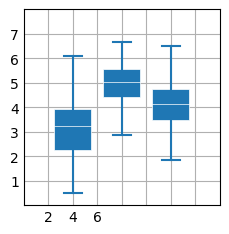

In [86]:
# boxplot(X)

plt.style.use('_mpl-gallery')

# make data:
np.random.seed(10)
D = np.random.normal((3, 5, 4), (1.25, 1.00, 1.25), (100, 3))

# plot
fig, ax = plt.subplots()
VP = ax.boxplot(D, positions=[2, 4, 6], widths=1.5, patch_artist=True,
                showmeans=False, showfliers=False,
                medianprops={"color": "white", "linewidth": 0.5},
                boxprops={"facecolor": "C0", "edgecolor": "white",
                          "linewidth": 0.5},
                whiskerprops={"color": "C0", "linewidth": 1.5},
                capprops={"color": "C0", "linewidth": 1.5})

ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
       ylim=(0, 8), yticks=np.arange(1, 8))

plt.show() 

#### Best Case Use of Boxplot

- Data Distribution Comparison: Box plots are highly effective for comparing the distributions of multiple datasets or groups. They provide a compact summary of key statistics, such as the median, quartiles, and potential outliers. This makes them valuable for visualizing and comparing variables across different categories or conditions, such as comparing test scores between different schools or assessing the performance of different models in machine learning.

- Outlier Detection: Box plots are useful for identifying potential outliers within a dataset. Outliers are data points that deviate significantly from the bulk of the data and are typically represented as individual points beyond the "whiskers" of the box plot. Detecting and addressing outliers is essential in data cleaning and understanding data quality.

- Skewness and Spread Analysis: Box plots provide insights into the skewness and spread of a distribution. By examining the length and orientation of the box and whiskers, you can gauge whether the data is symmetric or skewed and whether it has a wide or narrow spread. This information is valuable for understanding the variability and central tendency of your data.

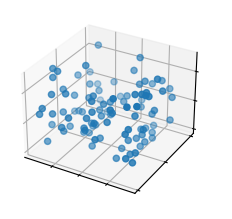

In [94]:
# 3D scatterplot

plt.style.use('_mpl-gallery')

# Make data
np.random.seed(19680801)
n = 100
rng = np.random.default_rng()
xs = rng.uniform(23, 32, n)
ys = rng.uniform(0, 100, n)
zs = rng.uniform(-50, -25, n)

# Plot
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.scatter(xs, ys, zs)

ax.set(xticklabels=[],
       yticklabels=[],
       zticklabels=[])

plt.show()

#### Best Cases For 3D ScatterPlot
- Multivariate Data Visualization: 3D scatter plots are useful when you want to visualize and explore relationships between three continuous variables simultaneously. Each data point is represented by a point in 3D space, with the three axes corresponding to the variables of interest. This is valuable for understanding complex data patterns and dependencies that may not be evident in 2D plots.

- Spatial Data Analysis: When working with spatial data, a 3D scatter plot can help you visualize the positions and relationships of data points in three-dimensional space. This is useful in fields like geospatial analysis, where you might be examining geographic coordinates (latitude, longitude, elevation) or 3D point clouds from LiDAR or other sensors.

- Scientific Data Exploration: Researchers in various scientific disciplines, such as chemistry, physics, and biology, often use 3D scatter plots to visualize and analyze experimental data with three independent variables. For example, scientists might examine the relationships between temperature, pressure, and reaction rate in a chemical experiment.

# Other plots Includes:
- Plots of arrays and fields
    - imshow(Z)
    - pcolormesh(X, Y, Z)
    - contour(X, Y, Z)
    - contourf(X, Y, Z)
    - barbs(X, Y, U, V)
    - quiver(X, Y, U, V)
    - streamplot(X, Y, U, V)
- Unstructured coordinates
    - tricontour(x, y, z)
    - tricontourf(x, y, z)
    - tripcolor(x, y, z)
    - triplot(x, y)

#### Customising and Sharing PLots

To customise plots we need to see different aspects of a simple plot such as:
- axis title (for x and y or even z)
- font size
- color and palettes
- other customisations

Let's us explore some of them below

# Exercise

[See exercise]()

### SEABORN <a class="anchor" id="seaborn"></a>

#### What is Seaborn

Seaborn is a library for making statistical graphics in Python. It builds on top of matplotlib and integrates closely with pandas data structures.

Seaborn helps you explore and understand your data. Its plotting functions operate on dataframes and arrays containing whole datasets and internally perform the necessary 
semantic mapping and statistical aggregation to produce informative plots. Its dataset-oriented, declarative API lets you focus on what the different elements of your plots mean, 
rather than on the details of how to draw them.

#### Prerequisite

To get started making seaborn plots in Python, you will need to install some packages below:

!pip install numpy

!pip install pandas

!pip install matplotlib

!pip install seaborn

## OR

# Using Conda
conda install -c conda-forge numpy

conda install -c conda-forge pandas

conda install -c conda-forge matplotlib

conda install -c conda-forge seaborn

In [73]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

#### Introduction to Regression Plots

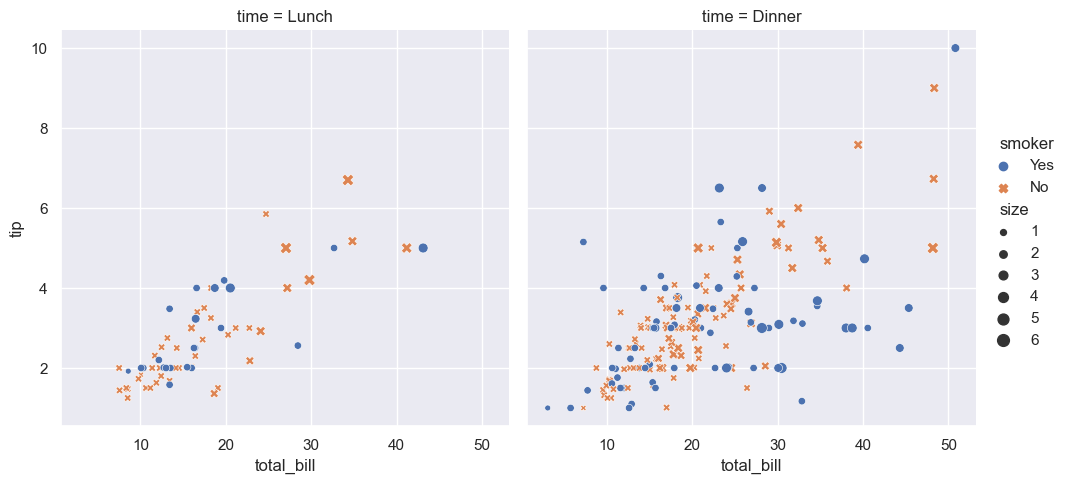

In [100]:
# Import seaborn
import seaborn as sns

# Apply the default theme
sns.set_theme()

# Load an example dataset
tips = sns.load_dataset("tips")

# Create a visualization
sns.relplot(
    data=tips,
    x="total_bill", y="tip", col="time",
    hue="smoker", style="smoker", size="size",
)

#### Types of Plot

There is no universally best way to visualize data. Different questions are best answered by different plots. Seaborn makes it easy to switch between different visual representations by using a consistent dataset-oriented API.

#### seaborn plotting functions


The function relplot() is named that way because it is designed to visualize many different statistical relationships. While scatter plots are often effective, relationships where one variable represents a measure of time are better represented by a line. The relplot() function has a convenient kind parameter that lets you easily switch to this alternate representation:

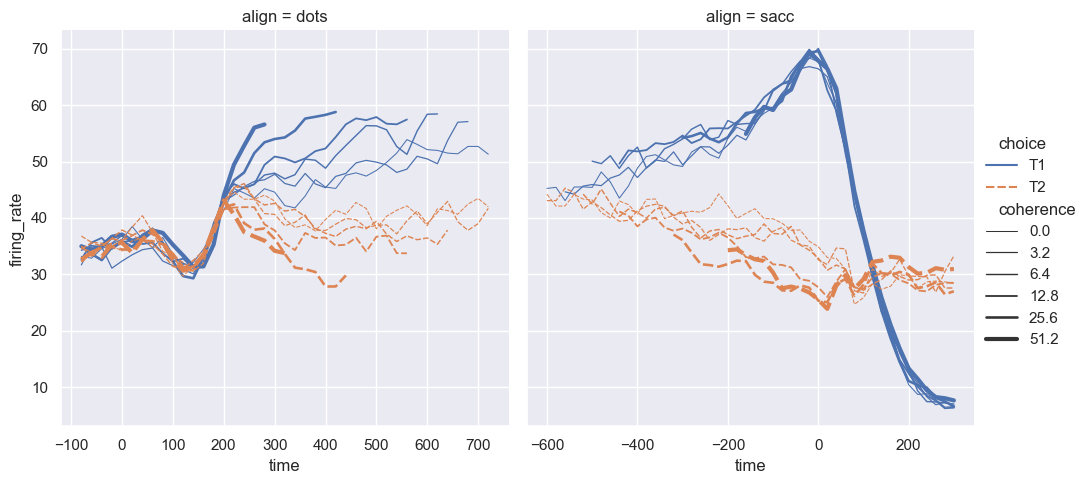

In [112]:
dots = sns.load_dataset("dots")
sns.relplot(
    data=dots, kind="line",
    x="time", y="firing_rate", col="align",
    hue="choice", size="coherence", style="choice",
    facet_kws=dict(sharex=False),
)

Often, we are interested in the average value of one variable as a function of other variables. Many seaborn functions will automatically perform the statistical estimation that is necessary to answer these questions:

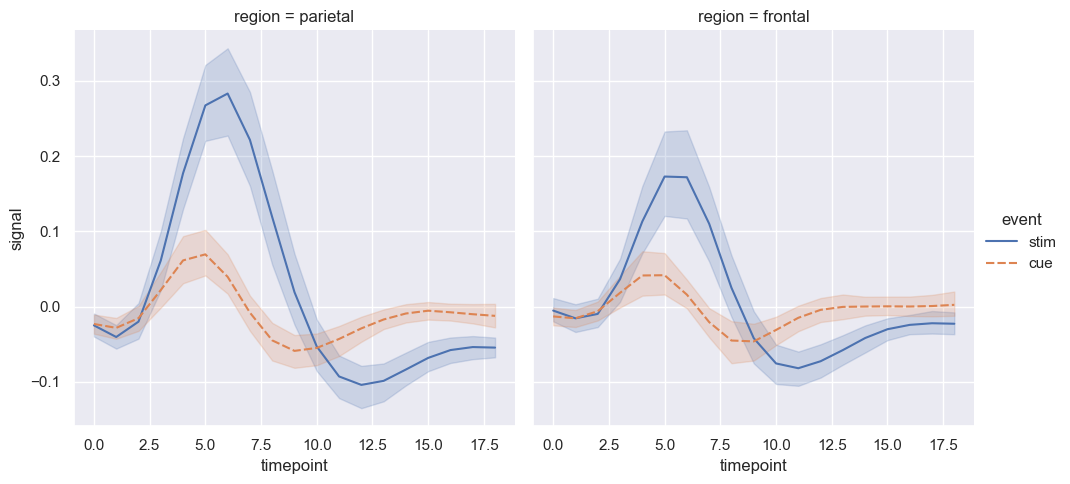

In [113]:
fmri = sns.load_dataset("fmri")
sns.relplot(
    data=fmri, kind="line",
    x="timepoint", y="signal", col="region",
    hue="event", style="event",
)

Statistical estimation in seaborn goes beyond descriptive statistics. For example, it is possible to enhance a scatterplot by including a linear regression model (and its uncertainty) using lmplot():

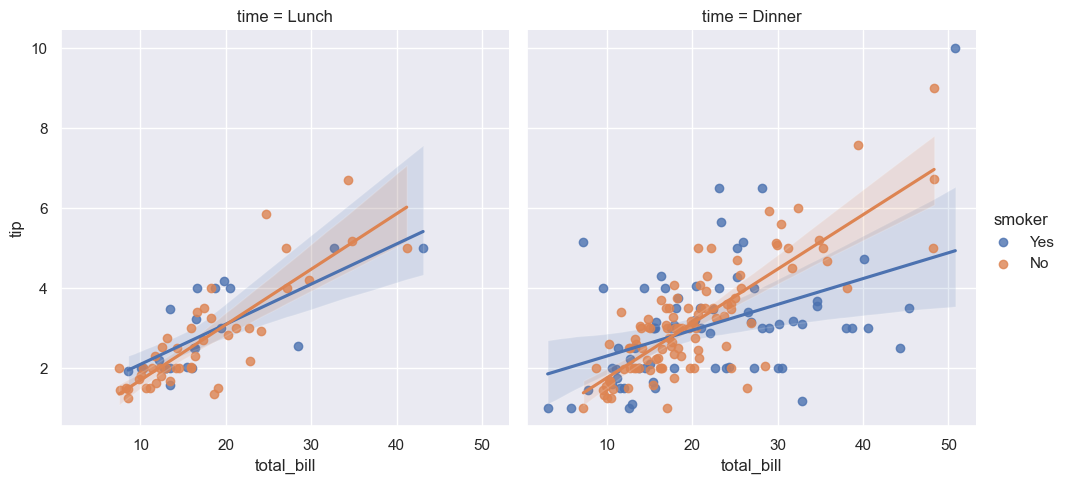

In [114]:
sns.lmplot(data=tips, x="total_bill", y="tip", col="time", hue="smoker")

##### Visualizing statistical relationships

Statistical analyses require knowledge about the distribution of variables in your dataset. The seaborn function displot() supports several approaches to visualizing distributions. These include classic techniques like histograms and computationally-intensive approaches like kernel density estimation:

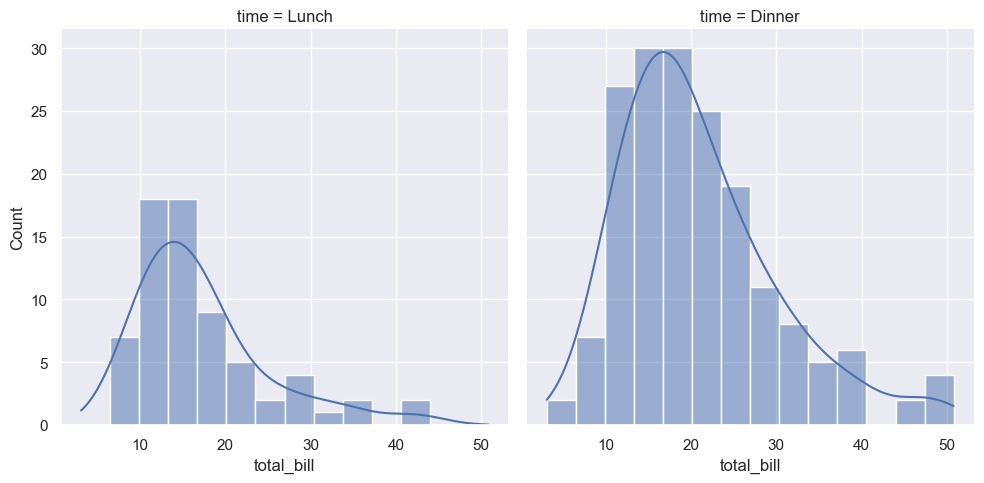

In [115]:
sns.displot(data=tips, x="total_bill", col="time", kde=True)

Seaborn also tries to promote techniques that are powerful but less familiar, such as calculating and plotting the empirical cumulative distribution function of the data:

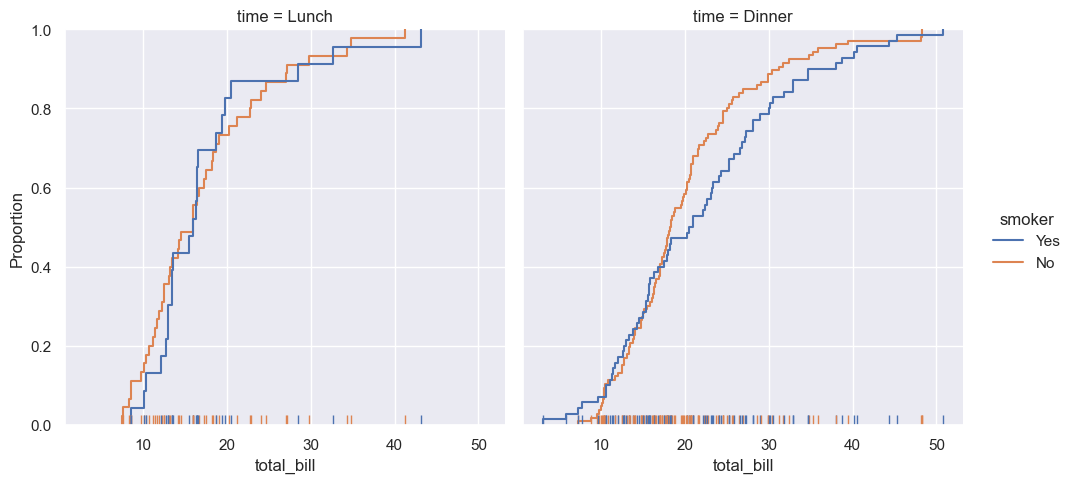

In [116]:
sns.displot(data=tips, kind="ecdf", x="total_bill", col="time", hue="smoker", rug=True)

##### Visualizing categorical data

Several specialized plot types in seaborn are oriented towards visualizing categorical data. They can be accessed through catplot(). These plots offer different levels of granularity. At the finest level, you may wish to see every observation by drawing a “swarm” plot: a scatter plot that adjusts the positions of the points along the categorical axis so that they don’t overlap:

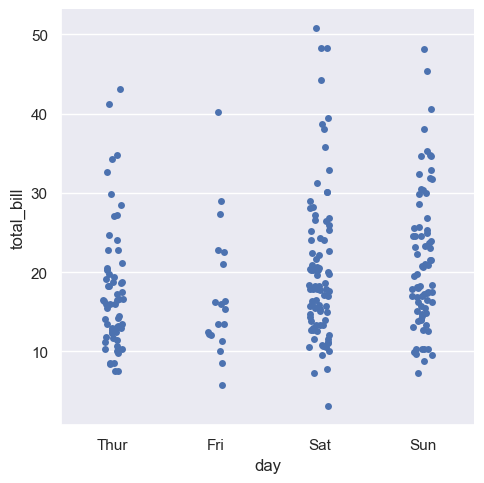

In [121]:
sns.catplot(data=tips, x="day", y="total_bill")

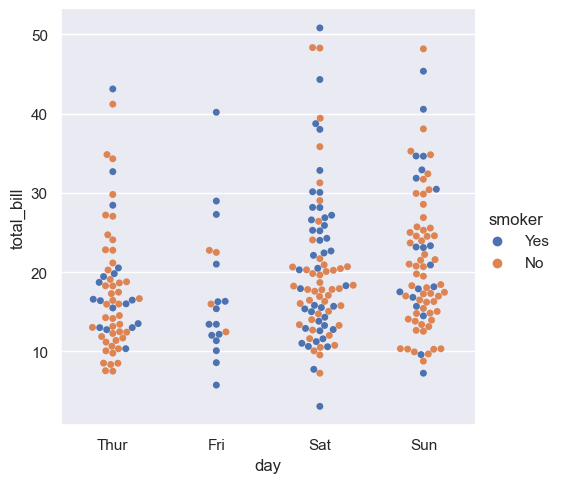

In [117]:
sns.catplot(data=tips, kind="swarm", x="day", y="total_bill", hue="smoker")

Alternately, you could use kernel density estimation to represent the underlying distribution that the points are sampled from:

In [ ]:
sns.catplot(data=tips, kind="swarm", x="day", y="total_bill", hue="smoker")

Or you could show only the mean value and its confidence interval within each nested category:

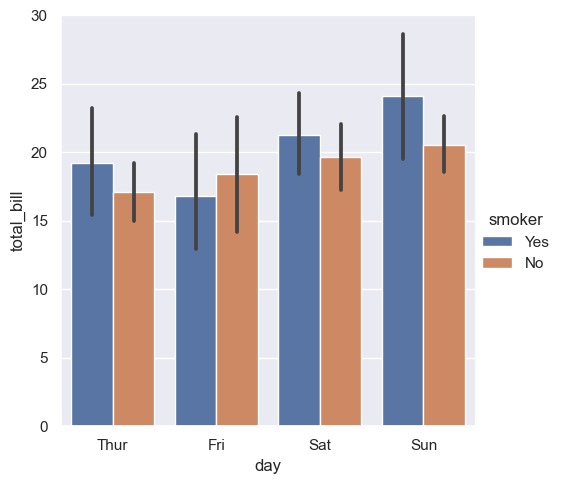

In [118]:
sns.catplot(data=tips, kind="bar", x="day", y="total_bill", hue="smoker")

Boxplots

The first is the familiar boxplot(). This kind of plot shows the three quartile values of the distribution along with extreme values. The “whiskers” extend to points that lie within 1.5 IQRs of the lower and upper quartile, and then observations that fall outside this range are displayed independently. This means that each value in the boxplot corresponds to an actual observation in the data.

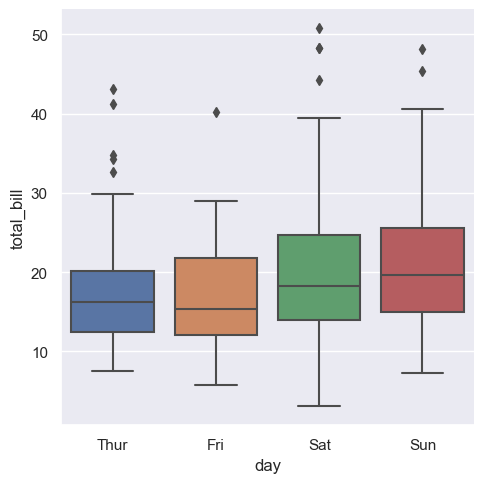

In [122]:
sns.catplot(data=tips, x="day", y="total_bill", kind="box")

Violinplots

A different approach is a violinplot(), which combines a boxplot with the kernel density estimation procedure described in the distributions tutorial:

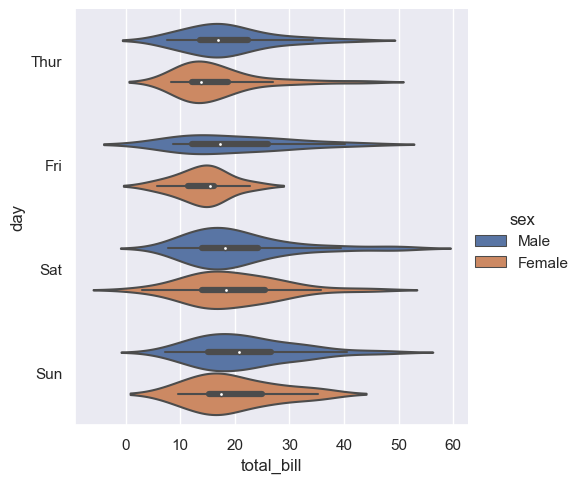

In [124]:
sns.catplot( data=tips, x="total_bill", y="day", hue="sex", kind="violin")

##### Estimating regression fits

Functions for drawing linear regression models
The two functions that can be used to visualize a linear fit are regplot() and lmplot().

In the simplest invocation, both functions draw a scatterplot of two variables, x and y, and then fit the regression model y ~ x and plot the resulting regression line and a 95% confidence interval for that regression:

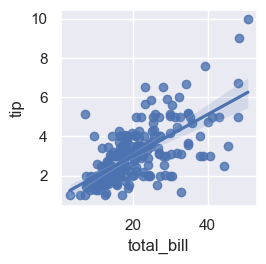

In [129]:
sns.regplot(x="total_bill", y="tip", data=tips);

It’s possible to fit a linear regression when one of the variables takes discrete values, however, the simple scatterplot produced by this kind of dataset is often not optimal:

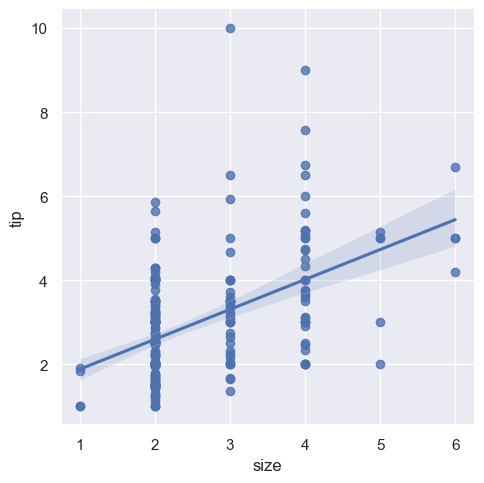

In [130]:
sns.lmplot(x="size", y="tip", data=tips);

##### Complex Datsets of data

Some seaborn functions combine multiple kinds of plots to quickly give informative summaries of a dataset. One, jointplot(), focuses on a single relationship. It plots the joint distribution between two variables along with each variable’s marginal distribution:

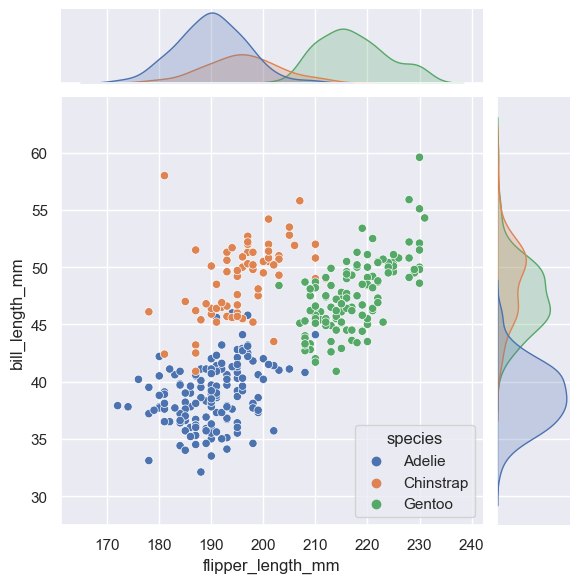

In [119]:
penguins = sns.load_dataset("penguins")
sns.jointplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", hue="species")

The other, pairplot(), takes a broader view: it shows joint and marginal distributions for all pairwise relationships and for each variable, respectively:

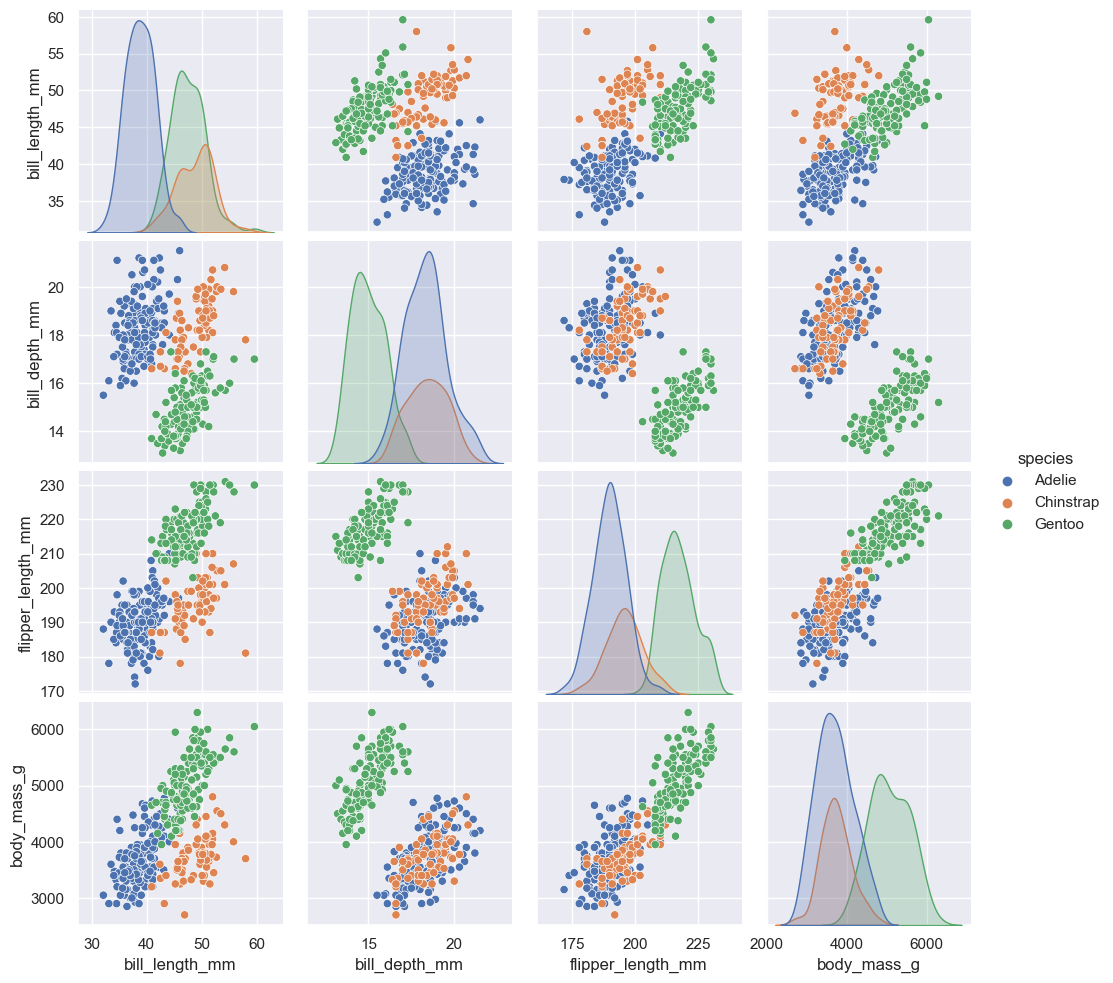

In [120]:
sns.pairplot(data=penguins, hue="species")

#### Choosing color palettes

In [125]:
sns.color_palette()

[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
 (0.5764705882352941, 0.47058823529411764, 0.3764705882352941),
 (0.8549019607843137, 0.5450980392156862, 0.7647058823529411),
 (0.5490196078431373, 0.5490196078431373, 0.5490196078431373),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]

In [126]:
sns.color_palette("tab10")

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

Using categorical Color Brewer palettes
Another source of visually pleasing categorical palettes comes from the Color Brewer tool (which also has sequential and diverging palettes, as we’ll see below).

In [128]:
sns.color_palette("Set2")

[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 (1.0, 0.8509803921568627, 0.1843137254901961),
 (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
 (0.7019607843137254, 0.7019607843137254, 0.7019607843137254)]

#### Exercise

[See exercise]()

### FOLIUM <a class="anchor" id="folium"></a>

#### What is Folium

Folium is a powerful Python library that helps you create several types of Leaflet maps. The fact that the Folium results are interactive makes this library very useful for dashboard building.

From the official Folium documentation page:

> Folium builds on the data wrangling strengths of the Python ecosystem and the mapping strengths of the Leaflet.js library. Manipulate your data in Python, then visualize it in on a Leaflet map via Folium.

> Folium makes it easy to visualize data that's been manipulated in Python on an interactive Leaflet map. It enables both the binding of data to a map for choropleth visualizations as well as passing Vincent/Vega visualizations as markers on the map.

> The library has a number of built-in tilesets from OpenStreetMap, Mapbox, and Stamen, and supports custom tilesets with Mapbox or Cloudmade API keys. Folium supports both GeoJSON and TopoJSON overlays, as well as the binding of data to those overlays to create choropleth maps with color-brewer color schemes.

#### Prerequisite

To get started making folium plots in Python, you will need to install some packages below:

!pip install numpy

!pip install pandas

!pip install matplotlib

!pip install folium

## OR

# Using Conda
conda install -c conda-forge numpy

conda install -c conda-forge pandas

conda install -c conda-forge matplotlib

conda install -c conda-forge folium

In [104]:
# import libraries
import matplotlib.pyplot as plt
import pandas as pd
import folium

import warnings
warnings.filterwarnings("ignore")

#### Plotting Maps

In [101]:
m = folium.Map(location=[45.5236, -122.6750])
m

In [106]:
# to save it in a file,
m.save("index.html")

In [107]:
# The default tiles are set to OpenStreetMap, but Stamen Terrain, Stamen Toner, Mapbox Bright, and Mapbox Control Room, and many others tiles are built in.

folium.Map(location=[45.5236, -122.6750], zoom_start=13)

#### Improving Folium Plots

In [ ]:
# Markers: There are numerous marker types, starting with a simple Leaflet style location marker with a popup and tooltip HTML.

In [108]:
m = folium.Map(location=[45.372, -121.6972], zoom_start=12, tiles="Stamen Terrain")

tooltip = "Click me!"

folium.Marker(
    [45.3288, -121.6625], popup="<i>Mt. Hood Meadows</i>", tooltip=tooltip
).add_to(m)
folium.Marker(
    [45.3311, -121.7113], popup="<b>Timberline Lodge</b>", tooltip=tooltip
).add_to(m)

m

In [109]:
# There is built in support for colors and marker icon types from bootstrap.

m = folium.Map(location=[45.372, -121.6972], zoom_start=12, tiles="Stamen Terrain")

folium.Marker(
    location=[45.3288, -121.6625],
    popup="Mt. Hood Meadows",
    icon=folium.Icon(icon="cloud"),
).add_to(m)

folium.Marker(
    location=[45.3311, -121.7113],
    popup="Timberline Lodge",
    icon=folium.Icon(color="green"),
).add_to(m)

folium.Marker(
    location=[45.3300, -121.6823],
    popup="Some Other Location",
    icon=folium.Icon(color="red", icon="info-sign"),
).add_to(m)


m

### WORDCLOUD <a class="anchor" id="wordcloud"></a>

#### What is Wrold CLoud

Word clouds (also known as text clouds or tag clouds) work in a simple way: the more a specific word appears in a source of textual data (such as a speech, blog post, or database), the bigger and bolder it appears in the word cloud.

Luckily, a Python package already exists in Python for generating word clouds. The package, called word_cloud was developed by Andreas Mueller. You can learn more about the package by following this link.

Let's use this package to learn how to generate a word cloud for a given text document.

#### Prerequisite

To get started making seaborn plots in Python, you will need to install some packages below:

!pip install numpy

!pip install pandas

!pip install matplotlib

!pip install wordcloud

!pip install pillow

## OR

conda install -c conda-forge numpy

conda install -c conda-forge pandas

conda install -c conda-forge matplotlib

conda install -c conda-forge wordcloud

conda install -c conda-forge pillow

In [59]:
# import libraries
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
import PIL
from PIL import Image

import warnings
warnings.filterwarnings("ignore")

#### Plotting Maps

#### Plotting A Word Cloud

- Using Comments on EMINEM's YOutube videos lets look at how to do produce a word cloud.

In [35]:
# Reads 'Youtube04-Eminem.csv' file
df = pd.read_csv(r"C:\Users\hp\Documents\Codes\projects\my_git\iLearn-DS\data\Youtube04-Eminem.csv")
df.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,z12rwfnyyrbsefonb232i5ehdxzkjzjs2,Lisa Wellas,NaN,+447935454150 lovely girl talk to me xxx﻿,1
1,z130wpnwwnyuetxcn23xf5k5ynmkdpjrj04,jason graham,2015-05-29T02:26:10.652000,I always end up coming back to this song<br />﻿,0
2,z13vsfqirtavjvu0t22ezrgzyorwxhpf3,Ajkal Khan,NaN,"my sister just received over 6,500 new <a rel=...",1
3,z12wjzc4eprnvja4304cgbbizuved35wxcs,Dakota Taylor,2015-05-29T02:13:07.810000,Cool﻿,0
4,z13xjfr42z3uxdz2223gx5rrzs3dt5hna,Jihad Naser,NaN,Hello I&#39;am from Palastine﻿,1


In [27]:
comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in df.CONTENT:
	
	# typecaste each val to string
	val = str(val)

	# split the value
	tokens = val.split()
	
	# Converts each token into lowercase
	for i in range(len(tokens)):
		tokens[i] = tokens[i].lower()
	
	comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
				background_color ='white',
				stopwords = stopwords,
				min_font_size = 10).generate(comment_words)

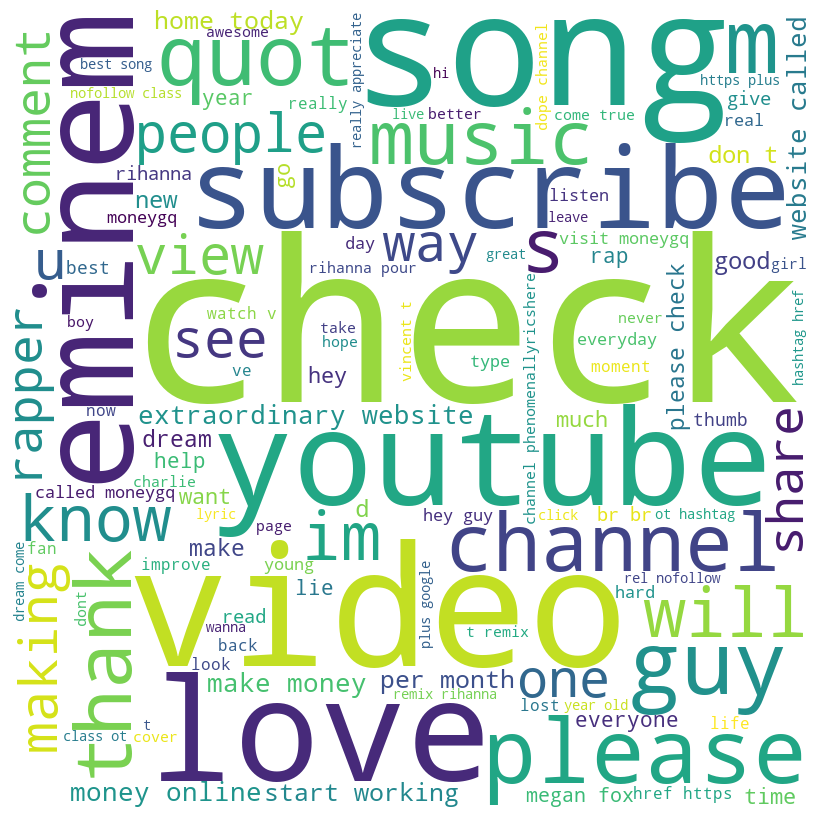

In [28]:
# plot the WordCloud image					
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

In [ ]:
#### Improving Word CLoud Plots

- To show some ways of improving word cloud let us look at this example using a [Wine Quality Data](https://www.kaggle.com/datasets/zynicide/wine-reviews?resource=download&select=winemag-data-130k-v2.csv)

In [37]:
# Reads 'Wine Quality Data' file
df = pd.read_csv(r"C:\Users\hp\Documents\Codes\projects\my_git\iLearn-DS\data\winemag-data-130k-v2.csv", index_col=0)
df.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [39]:
# get some summary of the dataset
print("There are {} observations and {} features in this dataset. \n".format(df.shape[0],df.shape[1]))

print("There are {} types of wine in this dataset such as {}... \n".format(len(df['variety'].unique()),
                                                                           ", ".join(df['variety'].unique()[0:5])))

print("There are {} countries producing wine in this dataset such as {}... \n".format(len(df['country'].unique()),
                                                                                      ", ".join(df['country'].unique()[0:5])))

There are 129971 observations and 13 features in this dataset. 

There are 708 types of wine in this dataset such as White Blend, Portuguese Red, Pinot Gris, Riesling, Pinot Noir... 

There are 44 countries producing wine in this dataset such as Italy, Portugal, US, Spain, France... 



In [40]:
# visualise some columns
df[["country", "description","points"]].head()

,country,description,points
0,Italy,"Aromas include tropical fruit, broom, brimston...",87
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87
2,US,"Tart and snappy, the flavors of lime flesh and...",87
3,US,"Pineapple rind, lemon pith and orange blossom ...",87
4,US,"Much like the regular bottling from 2012, this...",87


In [ ]:
# Create groups to compare features
To make comparisons between groups of a feature, you can use groupby() and compute summary statistics.

With the wine dataset, you can group by country and look at either the summary statistics for all countries' points and price or select the most popular and expensive ones.

In [42]:
# Groupby by country
country = df.groupby("country")

# Summary statistic of all countries
country.describe().head()

points                                                 \
                         count       mean       std   min    25%   50%    75%   
country                                                                         
Argentina               3800.0  86.710263  3.179627  80.0  84.00  87.0  89.00   
Armenia                    2.0  87.500000  0.707107  87.0  87.25  87.5  87.75   
Australia               2329.0  88.580507  2.989900  80.0  87.00  89.0  91.00   
Austria                 3345.0  90.101345  2.499799  82.0  88.00  90.0  92.00   
Bosnia and Herzegovina     2.0  86.500000  2.121320  85.0  85.75  86.5  87.25   

                                price                                     \
                          max   count       mean        std   min    25%   
country                                                                    
Argentina                97.0  3756.0  24.510117  23.430122   4.0  12.00   
Armenia                  88.0     2.0  14.500000   0.707107  14.0  14.25   
Australia               100.0  2294.0  35.437663  49.049458   5.0  15.00   
Austria                  98.0  2799.0  30.762772  27.224797   7.0  18.00   
Bosnia and Herzegovina   88.0     2.0  12.500000   0.707107  12.0  12.25   

                                             
                         50%    75%     max  
country                                      
Argentina               17.0  25.00   230.0  
Armenia                 14.5  14.75    15.0  
Australia               21.0  38.00   850.0  
Austria                 25.0  36.50  1100.0  
Bosnia and Herzegovina  12.5  12.75    13.0

In [43]:
# This selects the top 5 highest average points among all 44 countries:

country.mean().sort_values(by="points",ascending=False).head()

,points,price
country,,
England,91.581081,51.681159
India,90.222222,13.333333
Austria,90.101345,30.762772
Germany,89.851732,42.257547
Canada,89.369650,35.712598


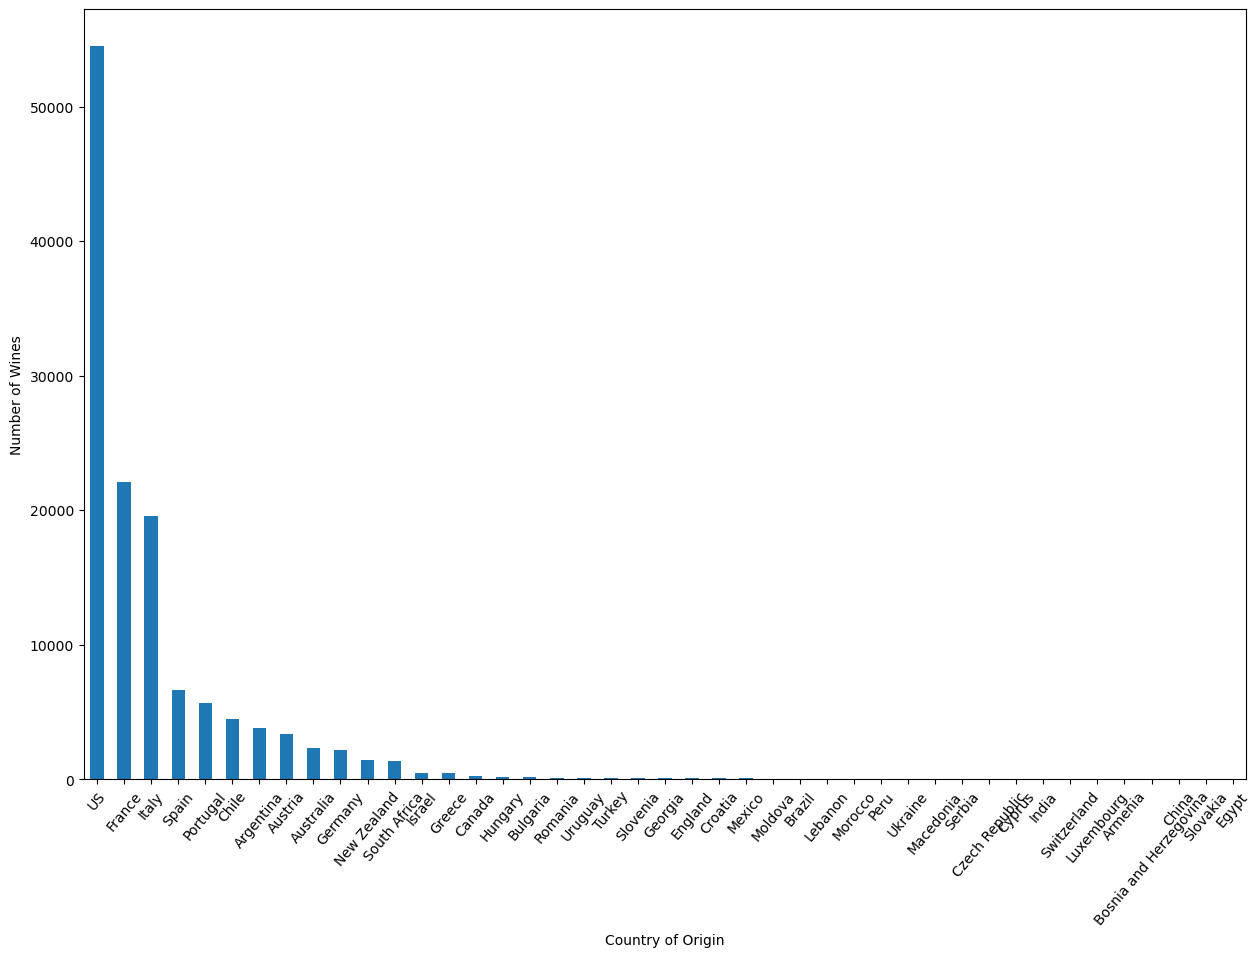

In [44]:
plt.figure(figsize=(15,10))
country.size().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Country of Origin")
plt.ylabel("Number of Wines")
plt.show()

Among 44 countries producing wine, the US has more than 50,000 types in the wine review dataset, twice as much as the next one in the rank, France - the country famous for its wine. Italy also produces a lot of quality wine, having nearly 20,000 wines open to review.

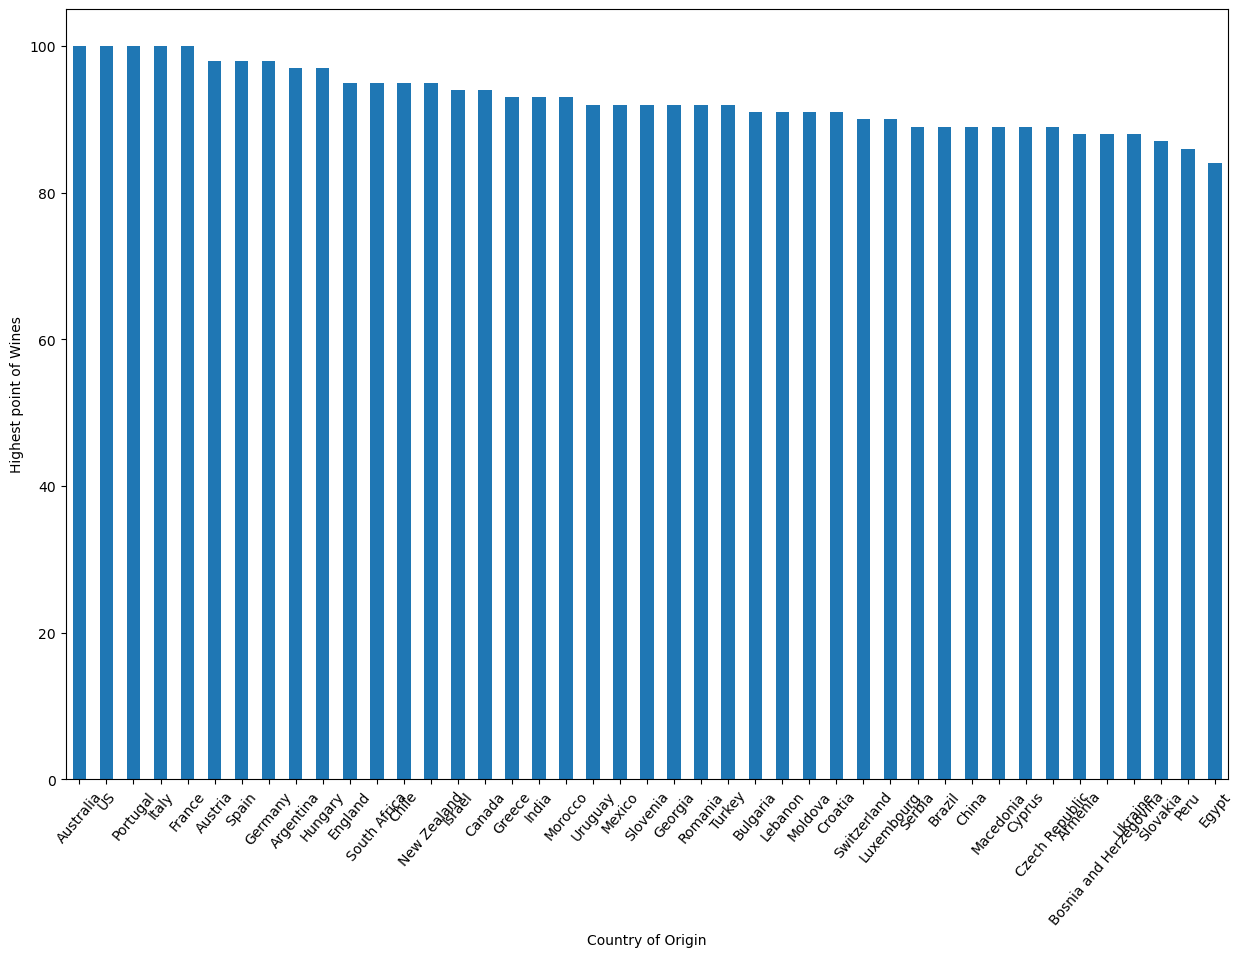

In [49]:
# Examine the data
# Let's now take a look at the plot of all 44 countries by its highest-rated wine, using the same plotting technique as above:

plt.figure(figsize=(15,10))
country.max().sort_values(by="points",ascending=False)["points"].plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Country of Origin")
plt.ylabel("Highest point of Wines")
plt.show()

##### Setting up a Basic Word Cloud in Python
- Start with a simple input
- So let's start with a simple example: using the first observation description as the input for the word cloud. The three steps are:
-Extract the review (text document)
- Create and generate a wordcloud image
- Display the cloud using matplotlib

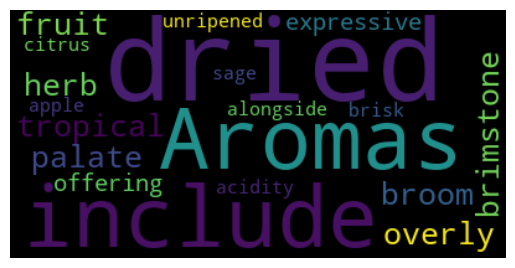

In [50]:
# Start with one review:
text = df.description[0]

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
# Changing optional word cloud arguments
Now, change some optional arguments of the word cloud like max_font_size, max_word, and background_color.

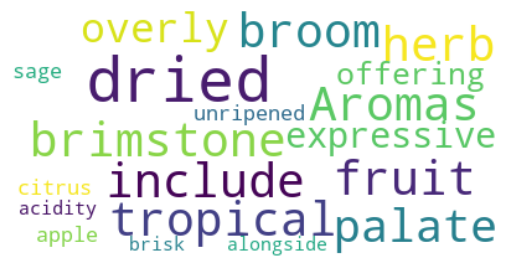

In [51]:
# lower max_font_size, change the maximum number of word and lighten the background:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
It seems like using max_font_size here might not be a good idea. It makes it more difficult to see the differences between word frequencies.
However, brightening the background makes the cloud easier to read.

If you want to save the image, WordCloud provides the function to_file.

In [53]:
# Save the image in the img folder:
wordcloud.to_file(r"C:\Users\hp\Documents\Codes\projects\my_git\iLearn-DS\img\first_review.png")

You've probably noticed the argument interpolation="bilinear" in the plt.imshow(). This is to make the displayed image appear more smoothly. For more information about the choice, this interpolation methods for imshow tutorial is a useful resource.

In [ ]:
# Combining data
So now you'll combine all wine reviews into one big text and create a big fat cloud to see which characteristics are most common in these wines.

In [54]:
text = " ".join(review for review in df.description)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 31661073 words in the combination of all review.


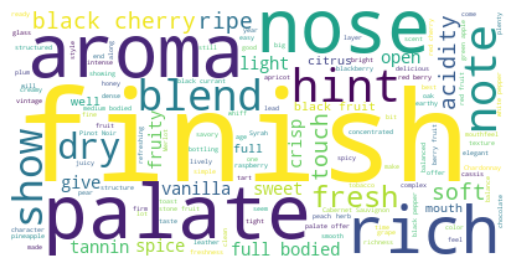

In [55]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["drink", "now", "wine", "flavor", "flavors"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

It seems like black cherry and full-bodied are the most mentioned characteristics, and Cabernet Sauvignon is the most popular of them all. This aligns with the fact that Cabernet Sauvignon "is one of the world's most widely recognized red wine grape varieties. It is grown in nearly every major wine-producing country among a diverse spectrum of climates from Canada's Okanagan Valley to Lebanon's Beqaa Valley

##### Word cloud visualization in Python
Now, let's pour these words into a cup (or even a bottle) of wine!

In order to create a shape for your word cloud, first, you need to find a PNG file to become the mask. Below is a nice one that is available on the internet: 

Not all mask images have the same format resulting in different outcomes, hence making the WordCloud function not working properly. 
To make sure that your mask works, let's take a look at it in the numpy array form:

In [60]:
wine_mask = np.array(Image.open(r"C:\Users\hp\Documents\Codes\projects\my_git\iLearn-DS\img\wine_mask.png"))
wine_mask

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\hp\\Documents\\Codes\\projects\\my_git\\iLearn-DS\\img\\wine_mask.png'

The way the masking functions works is that it requires all white part of the mask should be 255 not 0 (integer type). This value represents the "intensity" of the pixel. Values of 255 are pure white, whereas values of 1 are black. Here, you can use the provided function below to transform your mask if your mask has the same format as above. Notice if you have a mask that the background is not 0, but 1 or 2, adjust the function to match your mask.

First, you use the transform_format() function to swap number 0 to 255.




In [ ]:
def transform_format(val):
    if val == 0:
        return 255
    else:
        return val

Then, create a new mask with the same shape as the mask you have in hand and apply the function transform_format() to each value in each row of the previous mask.

In [57]:
# Transform your mask into a new one that will work with the function:
transformed_wine_mask = np.ndarray((wine_mask.shape[0],wine_mask.shape[1]), np.int32)

for i in range(len(wine_mask)):
    transformed_wine_mask[i] = list(map(transform_format, wine_mask[i]))

NameError: name 'wine_mask' is not defined

In [ ]:
# Transform your mask into a new one that will work with the function:
transformed_wine_mask = np.ndarray((wine_mask.shape[0],wine_mask.shape[1]), np.int32)

for i in range(len(wine_mask)):
    transformed_wine_mask[i] = list(map(transform_format, wine_mask[i]))

In [ ]:
# Now, you have a new mask in the correct form. Printout the transformed mask is the best way to check if the function works fine.
# Check the expected result of your mask
transformed_wine_mask

In [ ]:
With the right mask, you can start making the word cloud with your selected shape. 
Notice in the WordCloud function there is a mask argument that takes in the transformed mask that you created above. 
The contour_width and contour_color are, as their name suggests, arguments to adjust the outline characteristics of the cloud. 
The wine bottle you have here is a red wine bottle, so firebrick seems like a good choice for contour color. For more choices of color, you can take a look at this color code table.

In [ ]:
# Create a word cloud image
wc = WordCloud(background_color="white", max_words=1000, mask=transformed_wine_mask,
               stopwords=stopwords, contour_width=3, contour_color='firebrick')

# Generate a wordcloud
wc.generate(text)

# store to file
wc.to_file("img/wine.png")

# show
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

You can explore more more visualisation

#### Customising and Sharing PLots

Advantages of Word Clouds : 

- Analyzing customer and employee feedback.
- Identifying new SEO keywords to target.

Drawbacks of Word Clouds : 

- Word Clouds are not perfect for every situation.
- Data should be optimized for context.

### REFRENCES <a class="anchor" id="reference"></a>

In [ ]:
|S/N| links                                                                            |
|---|--------------------------------------------------------------------------------- |
|-  |https://matplotlib.org/stable/tutorials/introductory/quick_start.html             |
|-  |https://seaborn.pydata.org/examples/index.html                                    |
|-  |https://seaborn.pydata.org/examples/index.html                                    |
|-  |https://www.datacamp.com/tutorial/wordcloud-python                                |